# Investments notebook

This will be the notebook where I do my investment stuff!
Things to do:

- filter high volume stocks
- filter stocks by relative strenght
 - If market is bullish, consider only strong stocks
 - If market is bearish, consider only weak stocks
- Time setting function: how to chose last 4-5 days for patterns?
- Implement patterns and confirmation
- Implement stock indicators
- Implement basic screener
- Implement entry rules and position sizing

Make the necessary imports to what follows

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functions import simple_moving_average, exponential_moving_average, full_stochastic

## 1. Strategy type selection

### 1.1 Verification of market trend

Use four moving averages with different periods to verify the short-term and long-term trends of the S&P500. This analysis serves to decide wether to go for long or short strategies, when the market is bullish or bearish, respectively. If the market is found to be currently indecisive or trending sideways, it is recommended to stay out of the market. 

In [24]:
# Import data from S&P500

spx = yf.Ticker("^GSPC")
df_spx = spx.history(period="200d").drop(["Dividends","Stock Splits"], axis = 1)

# Compute simple moving averages 50, 100, 200 and exponential moving averages 20 and 40

sma_periods = [50, 100, 200]
ema_periods = [20, 40]

for period in sma_periods:
    simple_moving_average(df_spx, period)
    
for period in ema_periods:
    exponential_moving_average(df_spx, period)

# Verifies short- and long-time trends

short_uptrend = (df_spx.tail(1).Close > df_spx.tail(1).EMA20).bool() and (df_spx.tail(1).EMA20 > df_spx.tail(1).EMA40).bool()  
short_downtrend = (df_spx.tail(1).Close < df_spx.tail(1).EMA20).bool() and (df_spx.tail(1).EMA20 < df_spx.tail(1).EMA40).bool()

long_uptrend = (df_spx.tail(1).Close > df_spx.tail(1).SMA50).bool() and (df_spx.tail(1).SMA50 > df_spx.tail(1).SMA100).bool() and (df_spx.tail(1).SMA100 > df_spx.tail(1).SMA200).bool()
long_downtrend = (df_spx.tail(1).Close < df_spx.tail(1).SMA50).bool() and (df_spx.tail(1).SMA50 < df_spx.tail(1).SMA100).bool() and (df_spx.tail(1).SMA100 < df_spx.tail(1).SMA200).bool()

market_uptrend = short_uptrend and long_uptrend
market_downtrend = short_downtrend and long_downtrend

### 1.2 Verification of price oscillation

Even if the market is found to be currently uptrending or downtrending, one might prefer to stay out of the market in case the market is currently overbought or oversold, respectively. To verify wether this is the case, we recur to a simple stochastic indicator. Long strategies are recommended if the market is uptrending and not overbought, whereas short strategies are recommended if the market is downtrending and not oversold. Otherwise, it is recommended to stay out of the market until it regresses to the mean.

In [25]:
# Applies the stochastic oscillator to the data and checks price condition

full_stochastic(df_spx,5,3,3)

market_oversold = (df_spx.tail(1)["Fast K"] < 20).bool() and (df_spx.tail(1)["Slow K"] < 20).bool()
market_overbought = (df_spx.tail(1)["Fast K"] > 80).bool() and (df_spx.tail(1)["Slow K"] > 80).bool()

# Checks trend and price status to decide the strategy type to follow

long_bias = market_uptrend and not market_overbought
short_bias = market_downtrend and not market_oversold

### 1.3 Decision for market strategies

Taking into consideration the trend of the market and the current price status, we conclude which type of strategy to follow. If the market is currently uptrending and not in an overbought state, long positions are recommended. If the market is currently downtrending and not in an oversold state, short positions are recommended. Otherwise, it is recommended to stay inective until the market retraces.

Market is currently good for long positions.


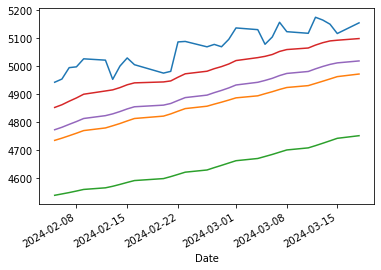

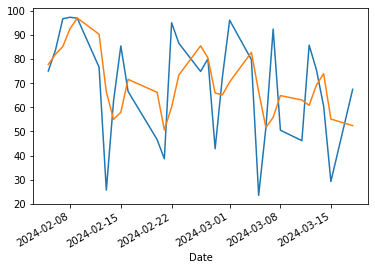

In [36]:
if market_uptrend and not market_overbought:
    print("Market is currently good for long positions.")
    
elif market_downtrend and not market_oversold:
    print("Market is currently good for short positions.")
    
else:
    print("Market is currently indecisive.")
    
df_spx.tail(30).Close.plot()
df_spx.tail(30).SMA50.plot()
df_spx.tail(30).SMA100.plot()
df_spx.tail(30).EMA20.plot()
df_spx.tail(30).EMA40.plot()
plt.show()

df_spx.tail(30)["Fast K"].plot()
df_spx.tail(30)["Slow K"].plot()
plt.show()

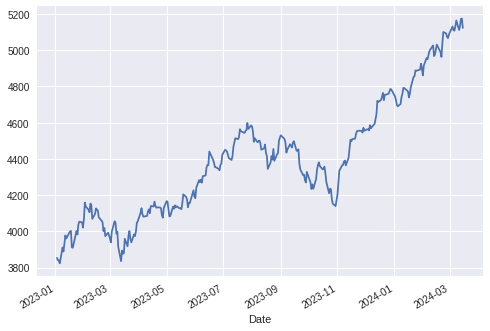

In [30]:
data.Open.plot()
plt.show()

In [17]:
msft = yf.Ticker("MSFT")

In [18]:
msft

yfinance.Ticker object <MSFT>

In [3]:
spx = yf.Ticker("^GSPC")

In [31]:
msft.history(period="1y").Volume
msft.history(start="2020-01-01", end="2021-01-01").Volume

Date
2020-01-02 00:00:00-05:00    22622100
2020-01-03 00:00:00-05:00    21116200
2020-01-06 00:00:00-05:00    20813700
2020-01-07 00:00:00-05:00    21634100
2020-01-08 00:00:00-05:00    27746500
                               ...   
2020-12-24 00:00:00-05:00    10550600
2020-12-28 00:00:00-05:00    17933500
2020-12-29 00:00:00-05:00    17403200
2020-12-30 00:00:00-05:00    20272300
2020-12-31 00:00:00-05:00    20942100
Name: Volume, Length: 253, dtype: int64

In [19]:
msft.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111256000000.0,104749000000.0,130256000000.0,136527000000.0
Other Short Term Investments,76552000000.0,90818000000.0,116032000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,7666000000.0


In [16]:
stocks = tickers.tickers

for i in stocks:
    print(i)

SPY


In [ ]:
data = yf.download('^GSPC','2023-01-01','2024-03-16')